# Creating SVGs with Python

Python is a great language for creating SVGs. It is a very flexible language that can be used to create SVGs in a variety of ways. In this notebook we will explore some of the ways that Python can be used to create SVGs.


In [ ]:
# Importing packages
import random
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import SVG
from graphviz import Digraph
from IPython.display import SVG, display
from graphviz import Digraph
from IPython.display import SVG, display

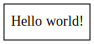

In [20]:
# Define the f string
f_string = f"Hello {'world'}!"
# Create a new graph
dot = Digraph()
# Add a node for the f string
dot.node('f_string', label=f_string, shape='rectangle')
# Render the graph as an SVG image
dot.format = 'svg'
svg_data = dot.pipe().decode('utf-8')
# Display the SVG image in the notebook
display(SVG(svg_data))

In [34]:
def show_svg(svg_string):
    """Display the SVG image in the notebook."""
    size = (500, 500)
    # Add whitespace and frame to the SVG image
    svg = f'<svg width="100%" height="100%" viewBox="-10 -10 120 120" xmlns="http://www.w3.org/2000/svg" style="background-color: white">'
    svg += f'<rect x="-5" y="-5" width="110" height="110" fill="none" stroke="black" stroke-width="1"/>'
    svg += f'{svg_string}'
    # Close the SVG image
    svg += '</svg>'
    display(SVG(svg))


### Diagonal

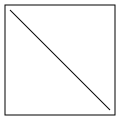

In [35]:
def draw_diagonal(x1, y1, x2, y2, color='black'):
    """Draw a diagonal line from (x1, y1) to (x2, y2)."""
    # Draw the diagonal line
    svg = f'<line x1="{x1}" y1="{y1}" x2="{x2}" y2="{y2}" stroke="{color}" />'
    return svg

show_svg(draw_diagonal(0, 0, 100, 100))


### Draw 100 random diagonals

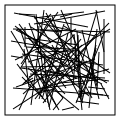

In [37]:
def draw_random_lines(n=100, color='black'):
    """Draw n random diagonals."""
    svg = ''
    for i in range(n):
        # Generate random coordinates
        x1 = random.randint(0, 100)
        y1 = random.randint(0, 100)
        x2 = random.randint(0, 100)
        y2 = random.randint(0, 100)
        # Draw the diagonal line
        svg += draw_diagonal(x1, y1, x2, y2, color)
    return svg

show_svg(draw_random_lines())

### Draw a maze of diagonals

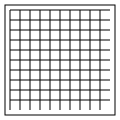

In [43]:
def draw_maze(n=10, color='black'):
    """Draw a maze of diagonals."""
    svg = ''
    for i in range(n):
        # Draw a vertical line
        svg += draw_diagonal(i * 10, 0, i * 10, 100, color)
        # Draw a horizontal line
        svg += draw_diagonal(0, i * 10, 100, i * 10, color)
    return svg

show_svg(draw_maze())


# Rectangle in yellow

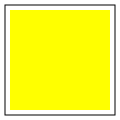

In [44]:
def draw_rectangle(x, y, width, height, color='black'):
    """Draw a rectangle with the given coordinates and dimensions."""
    # Draw the rectangle
    svg = f'<rect x="{x}" y="{y}" width="{width}" height="{height}" fill="{color}" />'
    return svg

show_svg(draw_rectangle(0, 0, 100, 100, 'yellow'))

# Circle


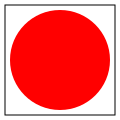

In [45]:
def draw_circle(x, y, radius, color='black'):
    """Draw a circle with the given coordinates and radius."""
    # Draw the circle
    svg = f'<circle cx="{x}" cy="{y}" r="{radius}" fill="{color}" />'
    return svg

show_svg(draw_circle(50, 50, 50, 'red'))


# Draw Splashes


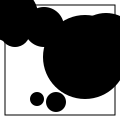

In [46]:
def draw_circles(n=10, color='black'):
    """Draw n circles with different radii."""
    svg = ''
    for i in range(n):
        # Generate random coordinates
        x = random.randint(0, 100)
        y = random.randint(0, 100)
        # Generate a random radius
        radius = random.randint(0, 50)
        # Draw the circle
        svg += draw_circle(x, y, radius, color)
    return svg

show_svg(draw_circles())

# Animation test

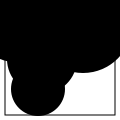

TypeError: unsupported operand type(s) for -=: 'module' and 'float'

In [96]:
import time

start = 5
while True:
    show_svg(draw_circles())
    time.sleep(0.1)
    time -= 0.1
    if start <= 0:
        break


# Draw a ring


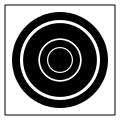

In [82]:
def draw_rings(n=2, color='black'):
    """Draw n rings with different radii."""
    svg = ''
    for i in range(n):
        # Generate random coordinates
        x = 50   # x = random.randint(0, 100)
        y = 50   # y = random.randint(0, 100)
        # Generate a random radius
        radius = random.randint(0, 50)
        # Draw the circle
        svg += draw_circle(x, y, radius, color)
        # Draw the circle
        svg += draw_circle(x, y, radius / 1.2, 'white')
        # Draw the circle
        svg += draw_circle(x, y, radius / 1.3, color)
        # Draw the circle
        svg += draw_circle(x, y, radius / 2, 'white')
        # Draw the circle
        svg += draw_circle(x, y, radius / 2.2, color)
    return svg

show_svg(draw_rings())

# Arcs


In [86]:
#draw a quarter of a square (symmetry coming)
import random

class Curve:
    def __init__(self,num,x,y,r,stroke,large_a_f=0,small_a_f=0,end_x=0,end_y=0):
        self.stroke = stroke
        self.start_x=x
        self.start_y=y
        self.r=r
        self.large_a_f = large_a_f
        self.small_a_f = small_a_f
        self.end_x = end_x
        self.end_y = end_y

    def get_path(self):
        return f'<path d="M {self.start_x} {self.start_y}\
            A {self.r} {self.r} 0 {self.large_a_f} {self.small_a_f} \
            {self.end_x} {self.end_y}" fill="none" stroke="black" \
            stroke-width="{self.stroke}"/>'

def main(num,imageSize):
    header = f'<svg viewBox="0 0 {imageSize} {imageSize}" xmlns="http://www.w3.org/2000/svg">\n'
    footer = f'</svg>'
    grid = {}
    c_size = imageSize/num
    print(header)
    for r in range(num):
        for c in range(num):
            n = random.randint(0,4)
            s = 4
            rad = c_size/2
            twos = n//2
            ones = n%2

            x = c * c_size + (rad * int(twos != ones))
            y = r * c_size + rad + (rad * twos) - (rad * ones)
            end_x=c * c_size + rad + (rad * int(twos != ones))
            end_y=r * c_size + (rad * int(ones)) + (rad * int(twos))
            large_a_f = 1
            small_a_f = 1 * twos


            curve = Curve(n,x,y,rad,s,large_a_f,small_a_f,end_x,end_y)
            grid[(r,c)] =curve
            print(curve.get_path())


    print(footer)

main(10,1000)


<svg viewBox="0 0 1000 1000" xmlns="http://www.w3.org/2000/svg">

<path d="M 50.0 100.0            A 50.0 50.0 0 1 1             100.0 50.0" fill="none" stroke="black"             stroke-width="4"/>
<path d="M 150.0 100.0            A 50.0 50.0 0 1 1             200.0 50.0" fill="none" stroke="black"             stroke-width="4"/>
<path d="M 200.0 50.0            A 50.0 50.0 0 1 1             250.0 100.0" fill="none" stroke="black"             stroke-width="4"/>
<path d="M 350.0 0.0            A 50.0 50.0 0 1 0             400.0 50.0" fill="none" stroke="black"             stroke-width="4"/>
<path d="M 400.0 50.0            A 50.0 50.0 0 1 0             450.0 0.0" fill="none" stroke="black"             stroke-width="4"/>
<path d="M 500.0 50.0            A 50.0 50.0 0 1 0             550.0 0.0" fill="none" stroke="black"             stroke-width="4"/>
<path d="M 600.0 50.0            A 50.0 50.0 0 1 1             650.0 100.0" fill="none" stroke="black"             stroke-width="4"/>
<pa

#  SVG Animation

In [91]:
# Show SVG animation in jupyter notebook using IPython.display
from IPython.display import HTML
from IPython.display import display

# Create an animation
def create_animation(svg, duration=1, repeatCount='indefinite'):
    """Create an animation from the given SVG."""
    # Create the animation
    animation = f'<animate attributeName="stroke-dashoffset" from="0" to="1000" dur="{duration}s" repeatCount="{repeatCount}" />'
    # Insert the animation into the SVG
    svg = svg.replace('>', f'>{animation}')
    return svg

# Show the animation
def show_animation(svg, duration=1, repeatCount='indefinite'):
    """Show the animation in the notebook."""
    # Create the animation
    animation = create_animation(svg, duration, repeatCount)
    # Show the animation
    display(HTML(animation))

# Create the SVG
svg = draw_circle(50, 50, 50, 'red')
# Show the animation
show_animation(svg, duration=1, repeatCount='indefinite')


# Interactive Widget

In [79]:
import drawsvg as draw
from drawsvg.widgets import DrawingWidget
import hyperbolic.poincare as hyper  # python3 -m pip install hyperbolic
from hyperbolic import euclid

# Create drawing
d = draw.Drawing(2, 2, origin='center', context=draw.Context(invert_y=True))
d.set_render_size(500)
d.append(draw.Circle(0, 0, 1, fill='orange'))
group = draw.Group()
d.append(group)

# Update the drawing based on user input
click_list = []
def redraw(points):
    group.children.clear()
    for x1, y1 in points:
        for x2, y2 in points:
            if (x1, y1) == (x2, y2): continue
            p1 = hyper.Point.from_euclid(x1, y1)
            p2 = hyper.Point.from_euclid(x2, y2)
            if p1.distance_to(p2) <= 2:
                line = hyper.Line.from_points(*p1, *p2, segment=True)
                group.draw(line, hwidth=0.2, fill='white')
    for x, y in points:
        p = hyper.Point.from_euclid(x, y)
        group.draw(hyper.Circle.from_center_radius(p, 0.1),
                   fill='green')
redraw(click_list)

# Create interactive widget and register mouse events
widget = DrawingWidget(d)
@widget.mousedown
def mousedown(widget, x, y, info):
    if (x**2 + y**2) ** 0.5 + 1e-5 < 1:
        click_list.append((x, y))
    redraw(click_list)
    widget.refresh()
@widget.mousemove
def mousemove(widget, x, y, info):
    if (x**2 + y**2) ** 0.5 + 1e-5 < 1:
        redraw(click_list + [(x, y)])
    widget.refresh()
widget

ModuleNotFoundError: No module named 'drawsvg'